Lochan Basyal

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow.keras.backend as K
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Input, Dense, Lambda, Dropout
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split
from tensorflow.keras.losses import mean_absolute_error

In [ ]:
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print (x_train.shape)
print (x_test.shape)

(60000, 784)
(10000, 784)


In [ ]:
def auto_encoder(encoding_dim = 32, shape=(784, )):

  input_img = Input(shape)
  encoded = Dense(encoding_dim, activation='relu')(input_img)
  decoded = Dense(784, activation='sigmoid')(encoded)
  autoencoder = Model(input_img, decoded)
  encoder = Model(input_img, encoded)
  encoded_input = Input(shape=(encoding_dim,))
  decoder_layer = autoencoder.layers[-1]
  decoder = Model(encoded_input, decoder_layer(encoded_input))
  autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
  return autoencoder, encoder

autoencoder, encoder = auto_encoder()
history = autoencoder.fit(x_train, x_train,
                epochs=5,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))



Epoch 1/5
235/235 [==============================] - 10s 32ms/step - loss: 0.2800 - val_loss: 0.1921
Epoch 2/5
235/235 [==============================] - 5s 19ms/step - loss: 0.1707 - val_loss: 0.1514
Epoch 3/5
235/235 [==============================] - 3s 14ms/step - loss: 0.1425 - val_loss: 0.1324
Epoch 4/5
235/235 [==============================] - 4s 18ms/step - loss: 0.1272 - val_loss: 0.1200
Epoch 5/5
235/235 [==============================] - 3s 13ms/step - loss: 0.1172 - val_loss: 0.1120


In [ ]:
reconstruction = autoencoder.predict(x_test)
test_loss = mean_absolute_error(x_test, reconstruction)
index = np.argpartition(test_loss, -10)[-10:]
err = []
err.append(test_loss.numpy()[index])
err[0][1]

313/313 [==============================] - 1s 2ms/step


0.117094815

313/313 [==============================] - 1s 2ms/step


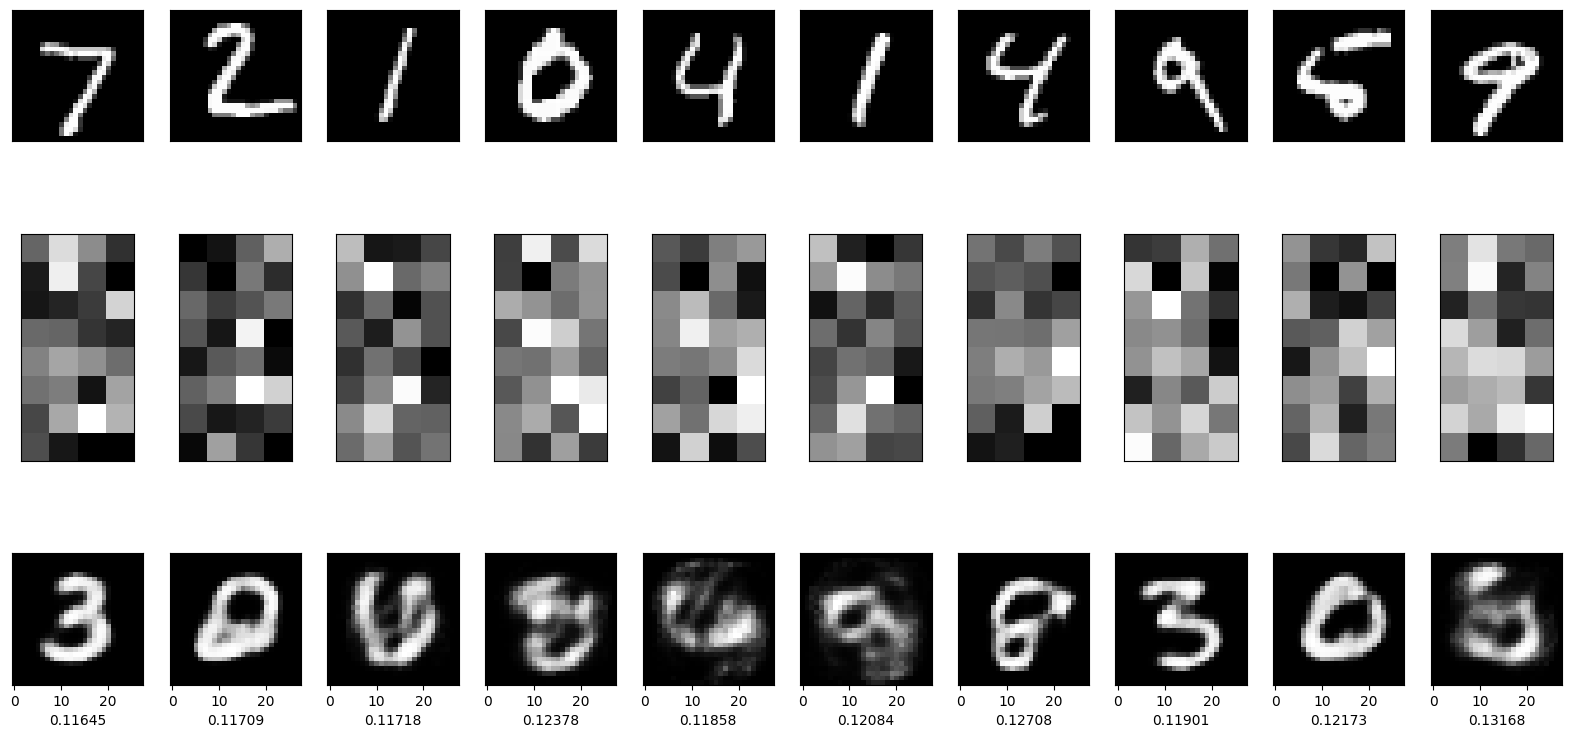

In [ ]:
encoded_imgs = encoder.predict(x_test)
decoded_imgs = autoencoder.predict(x_test)
n = 10
plt.figure(figsize=(20, 10))
for i in range(n):
 ax = plt.subplot(3, n, i + 1)
 plt.imshow(x_test[i].reshape(28, 28))
 plt.gray()
 ax.get_xaxis().set_visible(False)
 ax.get_yaxis().set_visible(False)
# ax.set_title("Original Image")

 ax = plt.subplot(3, n, i + 1 + n)
 plt.imshow(encoded_imgs[i].reshape(8, 4))
 plt.gray()
 ax.get_xaxis().set_visible(False)
 ax.get_yaxis().set_visible(False)
# ax.set_title("Encoded Image")
 ax = plt.subplot(3, n, i + 1 + 2*n)
 plt.imshow(decoded_imgs[index[i]].reshape(28, 28))
 plt.gray()
 rnd = round(err[0][i],5)
 ax.set_xlabel(rnd)
 ax.get_yaxis().set_visible(False)
# ax.set_title("Reconstructed Image with Error")
# ax.set_title("First Row: Original Image; Second Row: Encoded Image
plt.show()

Top 10 image samples reconstructed with the most autoencoder errors.

Part 2:

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/data1.csv")
df = df.dropna()
x = df.drop("Class", axis = 1)
y = df["Class"]
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=42)

In [ ]:
del autoencoder # delte previous instance of encoder

1 layer for encoder and decoder

In [ ]:
def auto_encoder(encoding_dim = 2, shape = (28, )):

  input_img = Input(shape=(28,))
  encoded = Dropout(0.01)(input_img)
  encoded = Dense(encoding_dim, activation='relu')(input_img)
  encoded = Dropout(0.01)(encoded)
  decoded = Dense(28, activation='sigmoid')(encoded)
  autoencoder = Model(input_img, decoded)
  encoder = Model(input_img, encoded)
  encoded_input = Input(shape=(encoding_dim,))
  decoder_layer = autoencoder.layers[-1]
  decoder = Model(encoded_input, decoder_layer(encoded_input))
  autoencoder.compile(optimizer='rmsprop', loss='binary_crossentropy')
  return autoencoder, encoder

In [ ]:
autoencoder, encoder = auto_encoder()
history = autoencoder.fit(x_train, x_train,
                epochs=5,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/5
891/891 [==============================] - 4s 3ms/step - loss: 0.1548 - val_loss: -0.4322
Epoch 2/5
891/891 [==============================] - 3s 3ms/step - loss: -1.1517 - val_loss: -2.0519
Epoch 3/5
891/891 [==============================] - 3s 4ms/step - loss: -3.0851 - val_loss: -4.5075
Epoch 4/5
891/891 [==============================] - 3s 3ms/step - loss: -5.8873 - val_loss: -7.7765
Epoch 5/5
891/891 [==============================] - 2s 3ms/step - loss: -9.5822 - val_loss: -11.9926


1781/1781 [==============================] - 3s 1ms/step


(array([5.0512e+04, 5.1600e+03, 7.2900e+02, 3.2200e+02, 1.0600e+02,
        4.5000e+01, 2.4000e+01, 1.8000e+01, 4.0000e+00, 9.0000e+00,
        8.0000e+00, 1.1000e+01, 9.0000e+00, 2.0000e+00, 0.0000e+00,
        1.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([ 0.2839807 ,  0.85672253,  1.42946434,  2.00220609,  2.57494807,
         3.14768982,  3.72043157,  4.29317331,  4.8659153 ,  5.43865728,
         6.01139879,  6.58414078,  7.15688276,  7.72962427,  8.30236626,
         8.87510777,  9.44785023, 10.02059174, 10.59333324, 11.16607571,
        11.73881721]),
 <BarContainer object of 20 artists>)

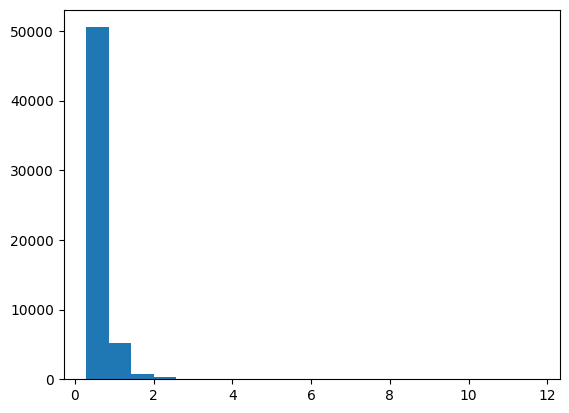

In [ ]:
reconstructed_image = autoencoder.predict(x_test)
loss = mean_absolute_error(x_test, reconstructed_image)
loss = loss.numpy()
plt.hist(loss, bins=20)

1781/1781 [==============================] - 3s 1ms/step


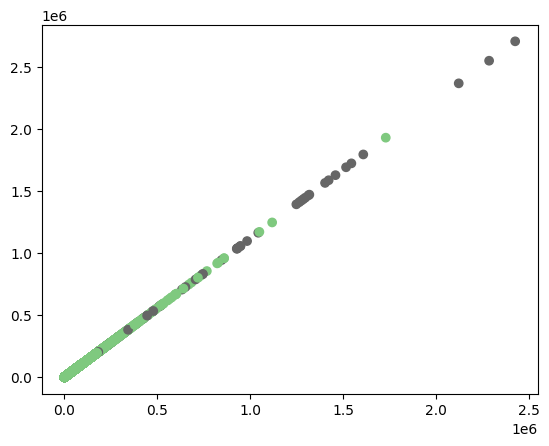

In [ ]:
x_pred = encoder.predict(x_test) # encoded prediction
x_pred = np.column_stack((x_pred, y_test))
x_pred = pd.DataFrame(x_pred)
plt.scatter(x_pred[0], x_pred[1], c = y_test, cmap='Accent')
plt.show()

3-layer for encoder and decoder

In [ ]:
del autoencoder # deleting previous instance of function

In [ ]:
def auto_encoder(encoding_dim = 2, shape=(28, )):

  input_img = Input(shape = shape)
  encoded = Dense(15, activation='relu')(input_img)
  encoded = Dense(7, activation='relu')(encoded)
  encoded = Dense(encoding_dim, activation='relu')(encoded)
  decoded = Dense(7, activation='relu')(encoded)
  decoded = Dense(15, activation='relu')(decoded)
  decoded = Dense(28, activation='sigmoid')(encoded)
  autoencoder = Model(input_img, decoded)
  encoder = Model(input_img, encoded)
  encoded_input = Input(shape=(encoding_dim,))
  decoder_layer = autoencoder.layers[-1]
  decoder = Model(encoded_input, decoder_layer(encoded_input))
  autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

  return autoencoder, encoder

In [ ]:
autoencoder, encoder = auto_encoder()
history = autoencoder.fit(x_train, x_train,
                epochs=5,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/5
891/891 [==============================] - 4s 3ms/step - loss: -26.7512 - val_loss: -185.9693
Epoch 2/5
891/891 [==============================] - 3s 3ms/step - loss: -1405.0713 - val_loss: -3968.6128
Epoch 3/5
891/891 [==============================] - 3s 4ms/step - loss: -9027.9824 - val_loss: -17633.0488
Epoch 4/5
891/891 [==============================] - 3s 4ms/step - loss: -29581.1133 - val_loss: -48774.9180
Epoch 5/5
891/891 [==============================] - 3s 3ms/step - loss: -69177.6875 - val_loss: -103087.4062


1781/1781 [==============================] - 4s 2ms/step


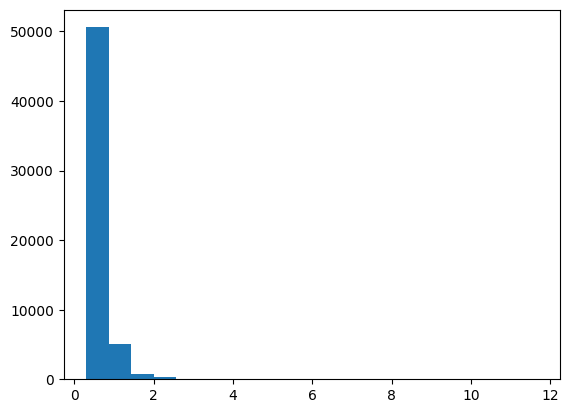

In [ ]:
reconstruction = autoencoder.predict(x_test)
loss = mean_absolute_error(x_test, reconstruction)
loss = loss.numpy()
plt.hist(loss, bins=20)
plt.show()

1781/1781 [==============================] - 2s 1ms/step


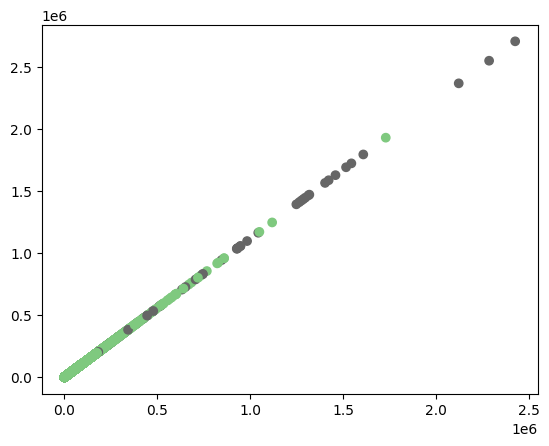

In [ ]:
x_pred = encoder.predict(x_test)
x_pred = np.column_stack((x_pred, y_test))
x_pred = pd.DataFrame(x_pred)
plt.scatter(x_pred[0], x_pred[1], c = y_test, cmap='Accent')
plt.show()

The loss distribution is almost the same for both models, but in the
scatter plots we can see some difference for these models.

Part III

In [ ]:
# m : batch size
m = 50
# n_z : latent dimension
n_z = 2
# n_epoch : number of epoches for iterations
n_epoch = 10
epsilon_std=1.0
# intermediate_dim = 512
# Q(z|X) -- encoder
tf.compat.v1.disable_eager_execution()
inputs = Input(shape=(784,))
h_q = Dense(512, activation='relu')(inputs)
mu = Dense(n_z, activation='linear')(h_q)
log_sigma = Dense(n_z, activation='linear')(h_q)

In [ ]:
def sample_z(args):
    mu, log_sigma = args
    eps = K.random_normal(shape=(m, n_z), mean=0., stddev=epsilon_std)
    return mu + K.exp(log_sigma / 2) * eps


In [ ]:
# Sample z ~ Q(z|X)
z = Lambda(sample_z)([mu, log_sigma])

In [ ]:
# P(X|z) -- decoder
decoder_hidden = Dense(512, activation='relu')
decoder_out = Dense(784, activation='sigmoid')

h_p = decoder_hidden(z)
outputs = decoder_out(h_p)


In [ ]:
# Overall VAE model, for reconstruction and training
vae = Model(inputs, outputs)
# Encoder model, to encode input into latent variable
# We use the mean as the output as it is the center point, the representative of the gaussian
encoder = Model(inputs, mu)

# Generator model, generate new data given latent variable z
d_in = Input(shape=(n_z,))
d_h = decoder_hidden(d_in)
d_out = decoder_out(d_h)
generator = Model(d_in, d_out)


In [ ]:
def vae_loss(y_true, y_pred):
    """ Calculate loss = reconstruction loss + KL loss for each data in minibatch """
    # E[log P(X|z)]
    recon = K.sum(K.binary_crossentropy(y_pred, y_true), axis=1)
    # D_KL(Q(z|X) || P(z|X)); calculate in closed form as both dist. are Gaussian
    kl = 0.5 * K.sum(K.exp(log_sigma) + K.square(mu) - 1. - log_sigma, axis=1)

    return recon + kl

In [ ]:
from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, y_test) = mnist.load_data()



In [ ]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [ ]:
vae.compile(optimizer='adam', loss=vae_loss)
vae.fit(x_train, x_train, batch_size=m, nb_epoch=n_epoch)


Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 17s 284us/sample - loss: 485.0580
Epoch 2/10
60000/60000 [==============================] - 16s 273us/sample - loss: 429.1837
Epoch 3/10
60000/60000 [==============================] - 16s 262us/sample - loss: 427.5644
Epoch 4/10
60000/60000 [==============================] - 15s 256us/sample - loss: 427.4283
Epoch 5/10
60000/60000 [==============================] - 16s 259us/sample - loss: 427.4209
Epoch 6/10
60000/60000 [==============================] - 15s 257us/sample - loss: 427.4189
Epoch 7/10
60000/60000 [==============================] - 15s 255us/sample - loss: 427.4179
Epoch 8/10
60000/60000 [==============================] - 15s 255us/sample - loss: 427.4173
Epoch 9/10
60000/60000 [==============================] - 15s 254us/sample - loss: 427.4169
Epoch 10/10
60000/60000 [==============================] - 15s 256us/sample - loss: 427.4168


/usr/local/lib/python3.9/dist-packages/keras/engine/training_v1.py:2359: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


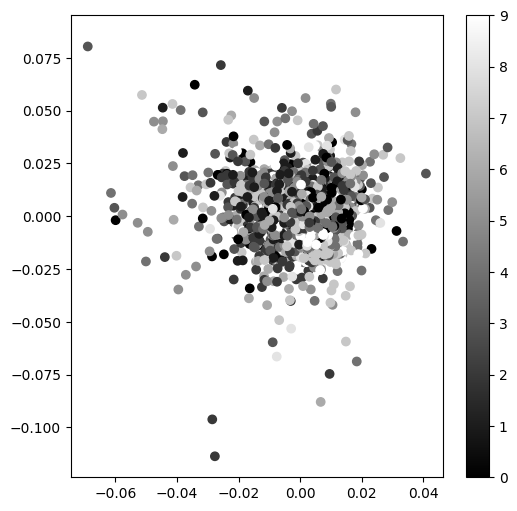

In [ ]:
x_test_encoded = encoder.predict(x_test, batch_size=m)
plt.figure(figsize=(6, 6))
plt.scatter(x_test_encoded[:, 0], x_test_encoded[:, 1], c=y_test)
plt.colorbar()
plt.show()


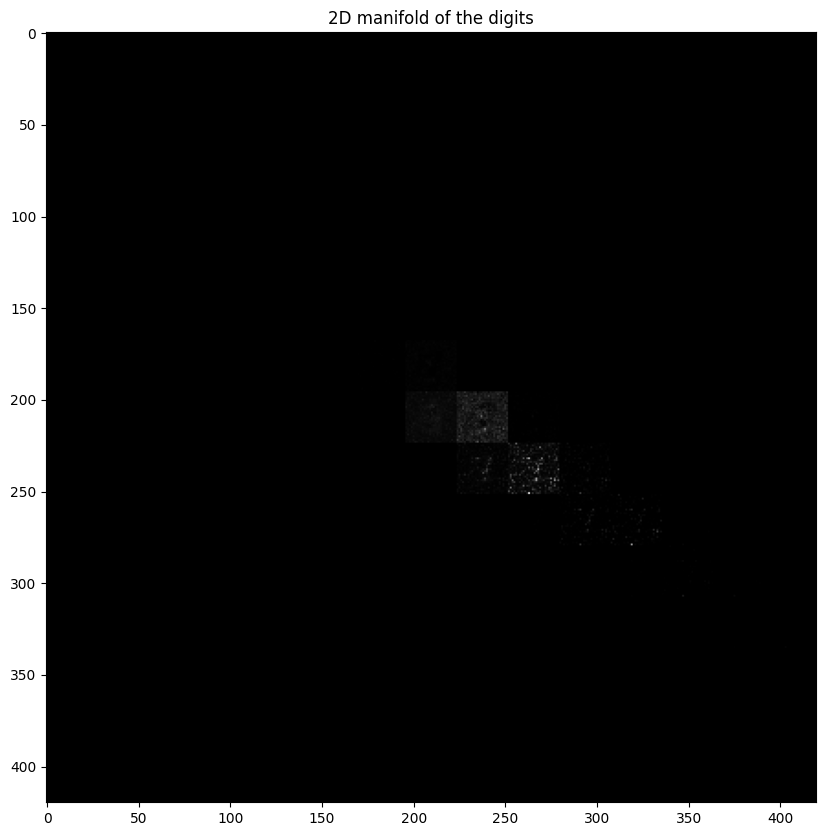

In [ ]:
# display a 2D manifold of the digits
n = 15  # figure with 15x15 digits
digit_size = 28
figure = np.zeros((digit_size * n, digit_size * n))
# we will sample n points within [-15, 15] standard deviations
grid_x = np.linspace(-15, 15, n)
grid_y = np.linspace(-15, 15, n)

for i, yi in enumerate(grid_x):
    for j, xi in enumerate(grid_y):
        z_sample = np.array([[xi, yi]]) * 2.0
        x_decoded = generator.predict(z_sample)
        digit = x_decoded[0].reshape(digit_size, digit_size)
        figure[i * digit_size: (i + 1) * digit_size,
               j * digit_size: (j + 1) * digit_size] = digit

plt.figure(figsize=(10, 10))
plt.title("2D manifold of the digits")
plt.imshow(figure)
plt.show()



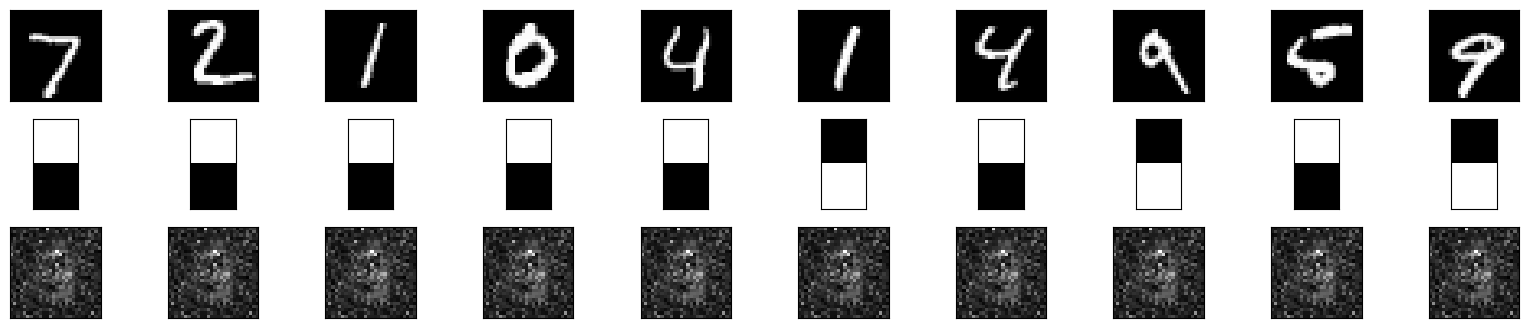

In [ ]:
# latent representation
encoded_imgs = encoder.predict(x_test)
# Reconstructed image
decoded_imgs = generator.predict(encoded_imgs)
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
 # display original
 ax = plt.subplot(3, n, i + 1)
 plt.imshow(x_test[i].reshape(28, 28))
 plt.gray()
 ax.get_xaxis().set_visible(False)
 ax.get_yaxis().set_visible(False)
 # display reconstruction
 ax = plt.subplot(3, n, i + 1 + n)
 plt.imshow(encoded_imgs[i].reshape(2, 1))
 plt.gray()
 ax.get_xaxis().set_visible(False)
 ax.get_yaxis().set_visible(False)
 # display reconstruction
 ax = plt.subplot(3, n, i + 1 + 2*n)
 plt.imshow(decoded_imgs[index[i]].reshape(28, 28))
 plt.gray()
 ax.get_xaxis().set_visible(False)
 ax.get_yaxis().set_visible(False)
plt.show()

For 784->512->64->2

In [ ]:
# m : batch size
m = 50
# n_z : latent dimension
n_z = 2
# n_epoch : number of epoches for iterations
n_epoch = 10
epsilon_std=1.0
# intermediate_dim = 512
# Q(z|X) -- encoder
inputs = Input(shape=(784,))
h_q = Dense(512, activation='relu')(inputs)
h_q = Dense(64, activation='relu')(h_q)
mu = Dense(n_z, activation='linear')(h_q)
log_sigma = Dense(n_z, activation='linear')(h_q)

In [ ]:
def sample_z(args):
    mu, log_sigma = args
    eps = K.random_normal(shape=(m, n_z), mean=0., stddev=epsilon_std)
    return mu + K.exp(log_sigma / 2) * eps



In [ ]:
# Sample z ~ Q(z|X)
z = Lambda(sample_z)([mu, log_sigma])



In [ ]:
# P(X|z) -- decoder
decoder_hidden = Dense(512, activation='relu')
decoder_out = Dense(784, activation='sigmoid')

h_p = decoder_hidden(z)
outputs = decoder_out(h_p)


In [ ]:
# Overall VAE model, for reconstruction and training
vae = Model(inputs, outputs)

# Encoder model, to encode input into latent variable
# We use the mean as the output as it is the center point, the representative of the gaussian
encoder = Model(inputs, mu)

# Generator model, generate new data given latent variable z
d_in = Input(shape=(n_z,))
d_h = decoder_hidden(d_in)
d_out = decoder_out(d_h)
generator = Model(d_in, d_out)


In [ ]:
def vae_loss(y_true, y_pred):
    """ Calculate loss = reconstruction loss + KL loss for each data in minibatch """
    # E[log P(X|z)]
    recon = K.sum(K.binary_crossentropy(y_pred, y_true), axis=1)
    # D_KL(Q(z|X) || P(z|X)); calculate in closed form as both dist. are Gaussian
    kl = 0.5 * K.sum(K.exp(log_sigma) + K.square(mu) - 1. - log_sigma, axis=1)

    return recon + kl


In [ ]:
vae.compile(optimizer='adam', loss=vae_loss)
vae.fit(x_train, x_train, batch_size=m, nb_epoch=n_epoch)


Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 17s 289us/sample - loss: 484.9834
Epoch 2/10
60000/60000 [==============================] - 16s 270us/sample - loss: 429.1641
Epoch 3/10
60000/60000 [==============================] - 16s 268us/sample - loss: 427.5612
Epoch 4/10
60000/60000 [==============================] - 16s 274us/sample - loss: 427.4226
Epoch 5/10
60000/60000 [==============================] - 16s 266us/sample - loss: 427.4183
Epoch 6/10
60000/60000 [==============================] - 16s 267us/sample - loss: 427.4173
Epoch 7/10
60000/60000 [==============================] - 17s 281us/sample - loss: 427.4170
Epoch 8/10
60000/60000 [==============================] - 17s 292us/sample - loss: 427.4168
Epoch 9/10
60000/60000 [==============================] - 17s 279us/sample - loss: 427.4167
Epoch 10/10
60000/60000 [==============================] - 16s 271us/sample - loss: 427.4166


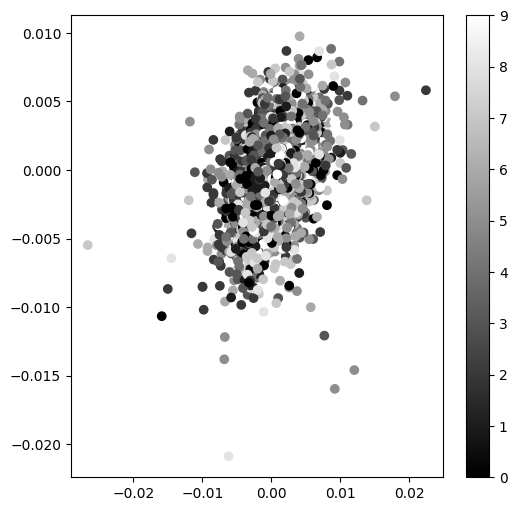

In [ ]:
x_test_encoded = encoder.predict(x_test, batch_size=m)
plt.figure(figsize=(6, 6))
plt.scatter(x_test_encoded[:, 0], x_test_encoded[:, 1], c=y_test)
plt.colorbar()
plt.show()


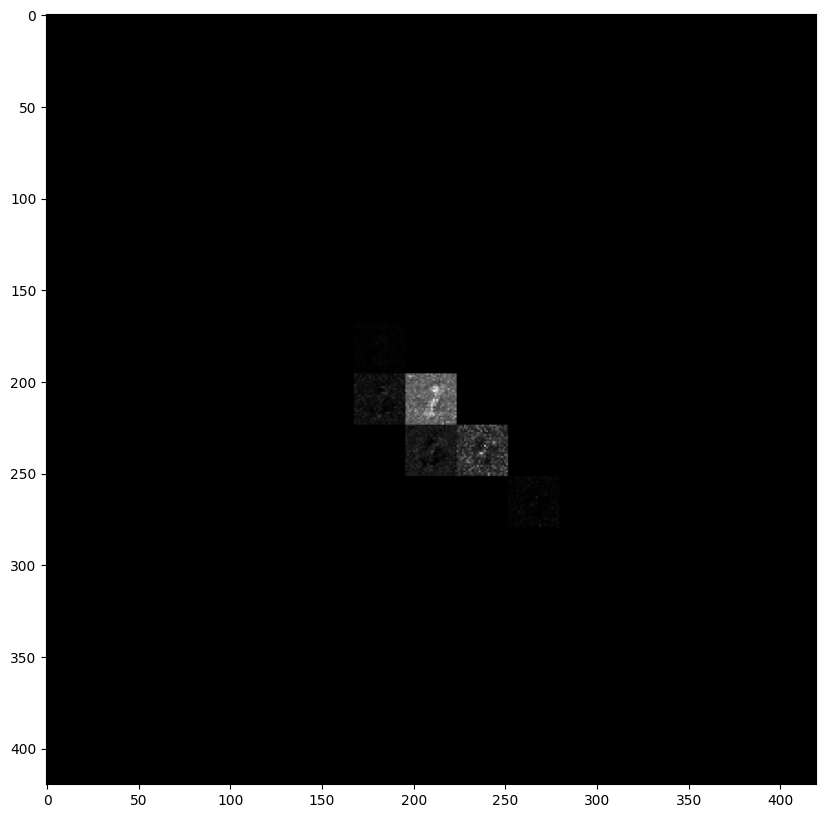

In [ ]:
# display a 2D manifold of the digits
n = 15  # figure with 15x15 digits
digit_size = 28
figure = np.zeros((digit_size * n, digit_size * n))
# we will sample n points within [-15, 15] standard deviations
grid_x = np.linspace(-15, 15, n)
grid_y = np.linspace(-15, 15, n)

for i, yi in enumerate(grid_x):
    for j, xi in enumerate(grid_y):
        z_sample = np.array([[xi, yi]]) * 2.0
        x_decoded = generator.predict(z_sample)
        digit = x_decoded[0].reshape(digit_size, digit_size)
        figure[i * digit_size: (i + 1) * digit_size,
               j * digit_size: (j + 1) * digit_size] = digit

plt.figure(figsize=(10, 10))
plt.imshow(figure)
plt.show()

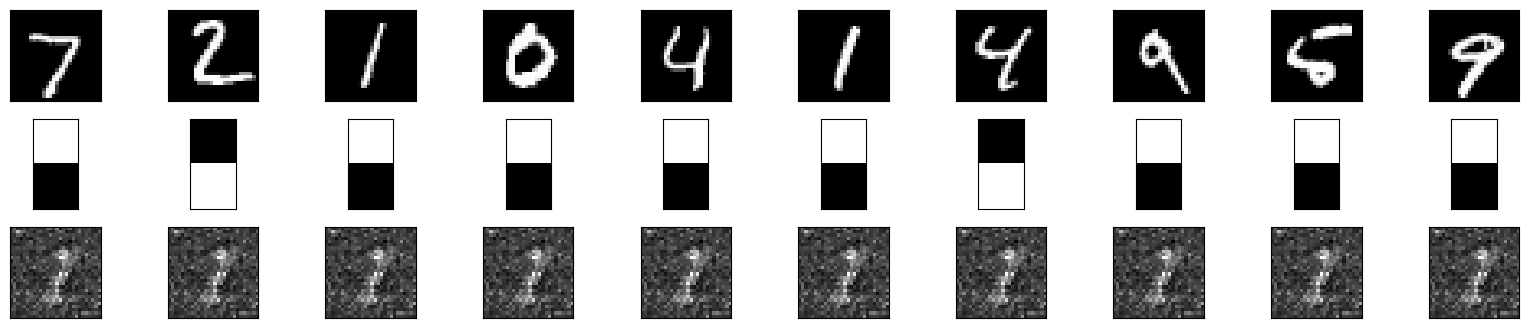

In [ ]:
# latent representation
encoded_imgs = encoder.predict(x_test)
# Reconstructed image
decoded_imgs = generator.predict(encoded_imgs)
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
 # display original
 ax = plt.subplot(3, n, i + 1)
 plt.imshow(x_test[i].reshape(28, 28))
 plt.gray()
 ax.get_xaxis().set_visible(False)
 ax.get_yaxis().set_visible(False)
 # display reconstruction
 ax = plt.subplot(3, n, i + 1 + n)
 plt.imshow(encoded_imgs[i].reshape(2, 1))
 plt.gray()
 ax.get_xaxis().set_visible(False)
 ax.get_yaxis().set_visible(False)
 # display reconstruction
 ax = plt.subplot(3, n, i + 1 + 2*n)
 plt.imshow(decoded_imgs[index[i]].reshape(28, 28))
 plt.gray()
 ax.get_xaxis().set_visible(False)
 ax.get_yaxis().set_visible(False)
plt.show()

There is no noticeable difference in the VAE outputs before and after dimensionality reduction.